In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC

# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [208]:
# constant variable for test size in train_test_split
TEST_SIZE = 0.3

<u>**Section 1 - Data Importing and Pre-Processing**</u>

In [209]:
# load dataset from online_shoppers_intention.csv
shoppers_df = pd.read_csv("Dataset 3 (Online Shoppers Intention)/online_shoppers_intention.csv")

In [210]:
# show first 5 rows of our dataset
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [211]:
# check the shape of our dataset
print(f"Rows: {shoppers_df.shape[0]}\nColumns: {shoppers_df.shape[1]}")

Rows: 12330
Columns: 18


In [212]:
# check the types of our dataset
print(shoppers_df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [213]:
# quick check for missing values in each column
print(shoppers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12202 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12195 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12207 non-null  float64
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [214]:
# get some base statistics about our dataset
shoppers_df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12202.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12195.000000,12330.000000,12330,12207.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503770,34.472398,31.731468,1194.746220,0.022191,0.043073,5.911196,0.061427,NaN,2.123618,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270882,140.749294,44.475503,1913.669288,0.048488,0.048597,18.632116,0.198917,NaN,0.911829,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [215]:
# summary of dataset using tabulate
summary = {
    "Characteristic": [
        "File Type",
        "Dimensions",
        "Data Types",
        "Target Variable",
        "Import Method",
        "Source",
        "Contains Missing Data"
    ],
    "Value/Description": [
        "CSV",
        "12,330 rows x 18 columns",
        "Numerical, Categorical, Boolean",
        "Revenue (True/False)",
        "pd.read_csv('online_shoppers_intention.csv')",
        "UCI Machine Learning Repository",
        "Yes"
    ]
}
summary_df = pd.DataFrame(summary)
print(tabulate(summary_df, headers='keys', tablefmt='github', showindex=False))

| Characteristic        | Value/Description                            |
|-----------------------|----------------------------------------------|
| File Type             | CSV                                          |
| Dimensions            | 12,330 rows x 18 columns                     |
| Data Types            | Numerical, Categorical, Boolean              |
| Target Variable       | Revenue (True/False)                         |
| Import Method         | pd.read_csv('online_shoppers_intention.csv') |
| Source                | UCI Machine Learning Repository              |
| Contains Missing Data | Yes                                          |


In [216]:
# check for columnms that contain missing values
missing = shoppers_df.isnull().sum()
print(missing[missing > 0])

Informational       128
PageValues          135
OperatingSystems    123
dtype: int64


In [217]:
# drop missing values
shoppers_df = shoppers_df.dropna()

# force every column into correct data type (some were wrong like Informational should be int but was float)
shoppers_df["Administrative"] = shoppers_df["Administrative"].astype(int)
shoppers_df["Administrative_Duration"] = shoppers_df["Administrative_Duration"].astype(float)

# this should have been int but csv has float values (all values are whole numbers)
shoppers_df["Informational"] = shoppers_df["Informational"].astype(int)
shoppers_df["Informational_Duration"] = shoppers_df["Informational_Duration"].astype(float)

shoppers_df["ProductRelated"] = shoppers_df["ProductRelated"].astype(int)
shoppers_df["ProductRelated_Duration"] = shoppers_df["ProductRelated_Duration"].astype(float)

shoppers_df["BounceRates"] = shoppers_df["BounceRates"].astype(float)

shoppers_df["ExitRates"] = shoppers_df["ExitRates"].astype(float)

# same here, should be int but csv has float values (all values are whole numbers)
shoppers_df["PageValues"] = shoppers_df["PageValues"].astype(int)

shoppers_df["SpecialDay"] = shoppers_df["SpecialDay"].astype(float)

# cast Month categorical type to ints 1-12
month_map = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}
# drop null months where month is not in month_map
shoppers_df = shoppers_df[shoppers_df["Month"].isin(month_map.keys())]
shoppers_df["Month"] = shoppers_df["Month"].map(month_map).astype(int)

shoppers_df["OperatingSystems"] = shoppers_df["OperatingSystems"].astype(int)

shoppers_df["Browser"] = shoppers_df["Browser"].astype(int)

shoppers_df["Region"] = shoppers_df["Region"].astype(int)

shoppers_df["TrafficType"] = shoppers_df["TrafficType"].astype(int)

# cast visitortype to int (0 = New_Visitor, 1 = Returning_Visitor, 2 = Other)
visitor_map = {"New_Visitor": 0, "Returning_Visitor": 1, "Other": 2}
shoppers_df["VisitorType"] = shoppers_df["VisitorType"].map(visitor_map)

shoppers_df["Weekend"] = shoppers_df["Weekend"].astype(bool)

shoppers_df["Revenue"] = shoppers_df["Revenue"].astype(bool)

In [218]:
# check the types again to verify changes were correct
print(shoppers_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11670 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11670 non-null  int64  
 1   Administrative_Duration  11670 non-null  float64
 2   Informational            11670 non-null  int64  
 3   Informational_Duration   11670 non-null  float64
 4   ProductRelated           11670 non-null  int64  
 5   ProductRelated_Duration  11670 non-null  float64
 6   BounceRates              11670 non-null  float64
 7   ExitRates                11670 non-null  float64
 8   PageValues               11670 non-null  int64  
 9   SpecialDay               11670 non-null  float64
 10  Month                    11670 non-null  int64  
 11  OperatingSystems         11670 non-null  int64  
 12  Browser                  11670 non-null  int64  
 13  Region                   11670 non-null  int64  
 14  TrafficType              11

In [219]:
agg_df = shoppers_df.groupby('Month')['PageValues'].mean().reset_index()
print(agg_df)

   Month  PageValues
0      2    0.894444
1      3    3.929189
2      5    5.354918
3      7    4.068884
4      8    5.713270
5      9    7.535147
6     10    8.537002
7     11    7.051352
8     12    6.813213


- This shows that certain months have no PageValues data, meaning the info is either missing or non-existent
- This also shows that the PageValues are the highest during the holiday months (Oct-Dec) because shopping traffic increases during this time due to promotions, sales, etc.
- PageValues measures the engagement the average page provides, during holiday months, there are usually more popups/pages signaling sales, promotions, etc. PageValues

In [220]:
# create a calculated column, TotalDuration, which combines all the other page durations
shoppers_df['TotalDuration'] = shoppers_df['Administrative_Duration'] + shoppers_df['Informational_Duration'] + shoppers_df['ProductRelated_Duration']

In [221]:
# drop any duplicate rows so that we can focus on unique behavior, without providing extra weight to identical rows
shoppers_df.drop_duplicates(inplace=True)

<u>**Section 2 - Data Analysis and Visualization**</u>

In [222]:
# separate numerical columns (int, and float) and categorical columns (object and bool)
num_cols = shoppers_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = shoppers_df.select_dtypes(include=['object', 'bool']).columns.tolist()
print("Numerical Variables:", num_cols)
print("Categorical Variables:", cat_cols)

Numerical Variables: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'TotalDuration']
Categorical Variables: ['Weekend', 'Revenue']


- Weekend and Revenue are our only categorical columns (boolean), everything else is numerical

In [223]:
# get summary statistics for our columns
num_cols = shoppers_df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Summary:")
print(shoppers_df[num_cols].describe())
cat_cols = shoppers_df.select_dtypes(include=['object', 'bool']).columns
print("\nCategorical Summary:")
for col in cat_cols:
    print(f"{col} value counts:")
    print(f"{shoppers_df[col].value_counts()}\n")

Numerical Summary:
       Administrative  Administrative_Duration  Informational  \
count    11552.000000             11552.000000   11552.000000   
mean         2.339335                82.358666       0.506146   
std          3.323623               178.244581       1.273640   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 9.750000       0.000000   
75%          4.000000                96.000000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            11552.000000    11552.000000             11552.000000   
mean                35.278493       31.864352              1203.906654   
std                143.551723       44.153017              1907.386634   
min                  0.000000        0.000000                 0.000000   
25%                  0.00

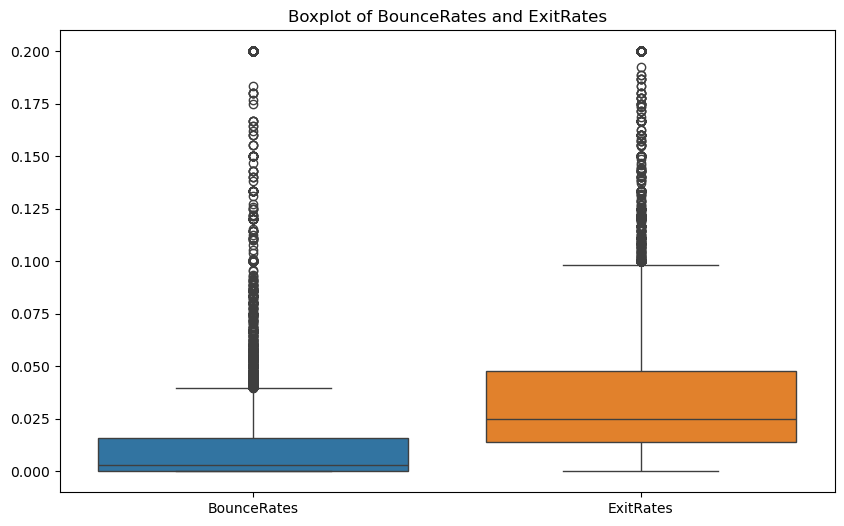

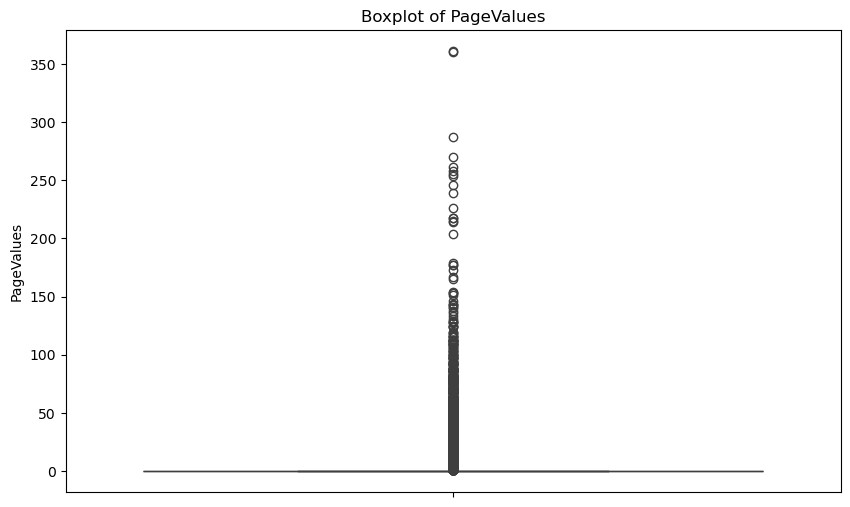

In [224]:
# create a boxplot of our key metrics dealing with webpage usage
plt.figure(figsize=(10,6))
sns.boxplot(data=shoppers_df[['BounceRates', 'ExitRates']])
plt.title('Boxplot of BounceRates and ExitRates')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=shoppers_df['PageValues'])
plt.title('Boxplot of PageValues')
plt.show()

- BounceRates and ExitRates are measured as a percentage and deal with the user ending their session on the site
- The boxplots for BounceRates and ExitRates llook very similar, both have a max of 0.2 and a min of 0
- They both also have longer upper whiskers, with a lot of upper outliers
- PageValues measures the value the average page provides in engaging the user during their session
- The boxplot for PageValues has a max of about 361 and a min/median of 0
- There are no whiskers, meaning there are a lot of entries with a PageValue of 0

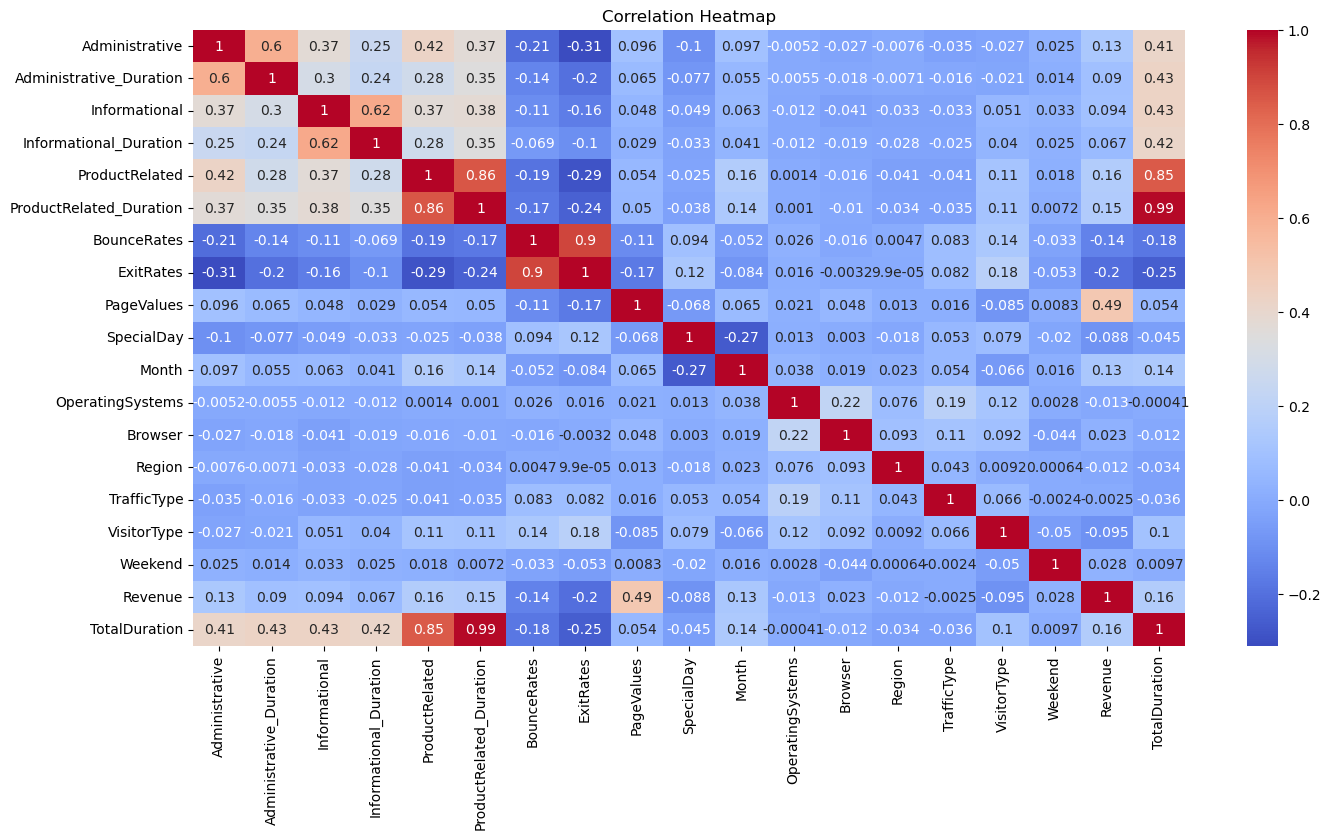

In [225]:
# plot a correlation heatmap between all columns
corr_matrix = shoppers_df.corr(numeric_only=True)
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Without going into detail about every single column, there are a lot of columns with 
- A main correlation between variables is the respective page columns and their duration column. For example, ProductRelated and ProductRelated_Duration have a strong positive correlation of 0.86
- Another thing to note, is BounceRates and ExitRates have a strong positive correlation of 0.9, because these metrics measure very similar aspects of a user's session
- Looking at the general heatmap, there doesn't seem to be very strong correlations between most variables (less than absolute value of 0.5), except for the one's mentioned above and a few others

Correlation of Independent Variables with Revenue:
PageValues                 0.489125
ProductRelated             0.160606
TotalDuration              0.156483
ProductRelated_Duration    0.153189
Administrative             0.134436
Month                      0.126363
Informational              0.094280
Administrative_Duration    0.090224
Informational_Duration     0.067417
Weekend                    0.027987
Browser                    0.023241
TrafficType               -0.002535
Region                    -0.012379
OperatingSystems          -0.013105
SpecialDay                -0.088062
VisitorType               -0.094846
BounceRates               -0.143872
ExitRates                 -0.204121
Name: Revenue, dtype: float64


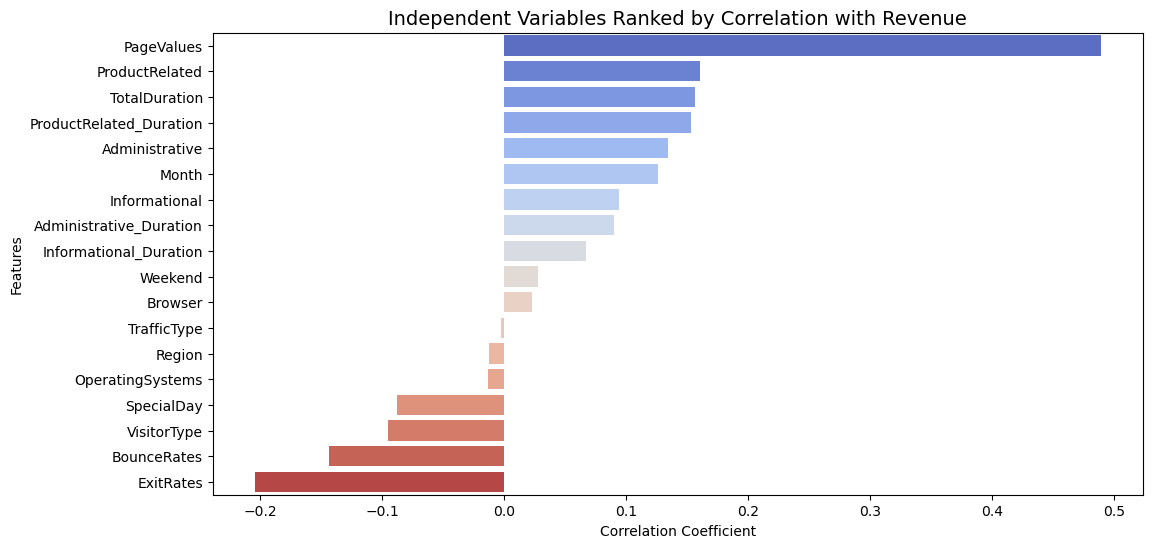

In [226]:
# create the same correlation matrix, but drop and sort by Revenue to see which variables have the highest correlation with Revenue
corr_matrix = shoppers_df.corr(numeric_only=True)
revenue_corr = corr_matrix['Revenue'].drop('Revenue')
revenue_corr_sorted = revenue_corr.sort_values(ascending=False)
print("Correlation of Independent Variables with Revenue:")
print(revenue_corr_sorted)
plt.figure(figsize=(12,6))
sns.barplot(x=revenue_corr_sorted.values, y=revenue_corr_sorted.index,
    palette='coolwarm')
plt.title('Independent Variables Ranked by Correlation with Revenue', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

- From this visual and the outputted correlations, we can see that no variables have a strong correlation with Revenue (none above absolute value of 0.5)
- PageValues has the highest correlation at 0.49, meaning that it could be our best predictor for Revenue
- Most of the other variables/columns have correlations below 0.3, showing that they have a weak relationship with Revenue

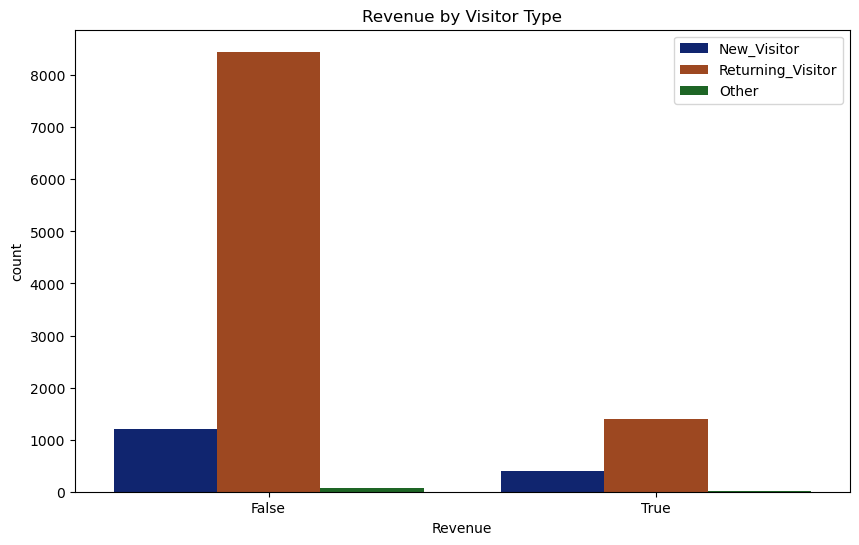

New_Visitor: 24.89%
Returning_Visitor: 14.26%
Other: 20.25%


In [227]:
# create a countplot to see how VisitorType affects Revenue
plt.figure(figsize=(10,6))
sns.countplot(x='Revenue', hue='VisitorType', data=shoppers_df, palette='dark')
plt.legend(labels=['New_Visitor', 'Returning_Visitor', 'Other'])
plt.title('Revenue by Visitor Type')
plt.show()

# print the mean Revenue for each VisitorType
visitor_map_index = {0: 'New_Visitor', 1: 'Returning_Visitor', 2: 'Other'}
x = shoppers_df.groupby('VisitorType')['Revenue'].mean()
for index, row in enumerate(x):
    print(f"{visitor_map_index[index]}: {row*100:.2f}%")


- This shows that our most common visitor type is Returning_Visitor
- Other visitor types are very uncommon for our dataset but about 20% of these visitors result in revenue
- New visitors are the most likely to result in revenue, with about 25% of new visitors resulting in revenue
- Even though we can see that Returning_Visitors are the most common, they are the least likely to result in revenue at around 14%

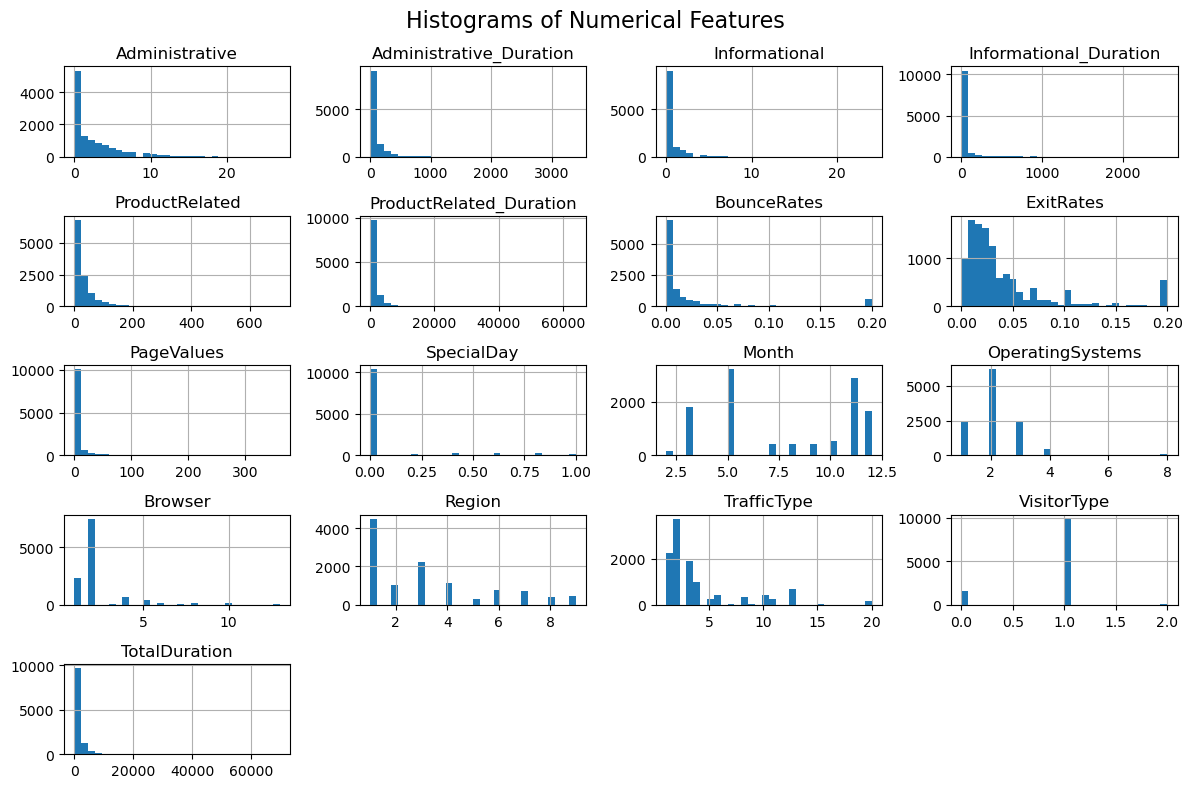

In [228]:
# create histograms for all numerical columns
shoppers_df[num_cols].hist(bins=30, figsize=(12,8))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
# flag/method to remove cramming
plt.tight_layout()
plt.show()

- A majority of the ploots seem to be heavily left skewed, with a majority of the observations/rows being lower values
- Region, Month, TrafficType, and VisitorType seem to have a more spread out distribution, with less skewness
- ExitRates seems to be the most normally distributed visual, but is still left skewed

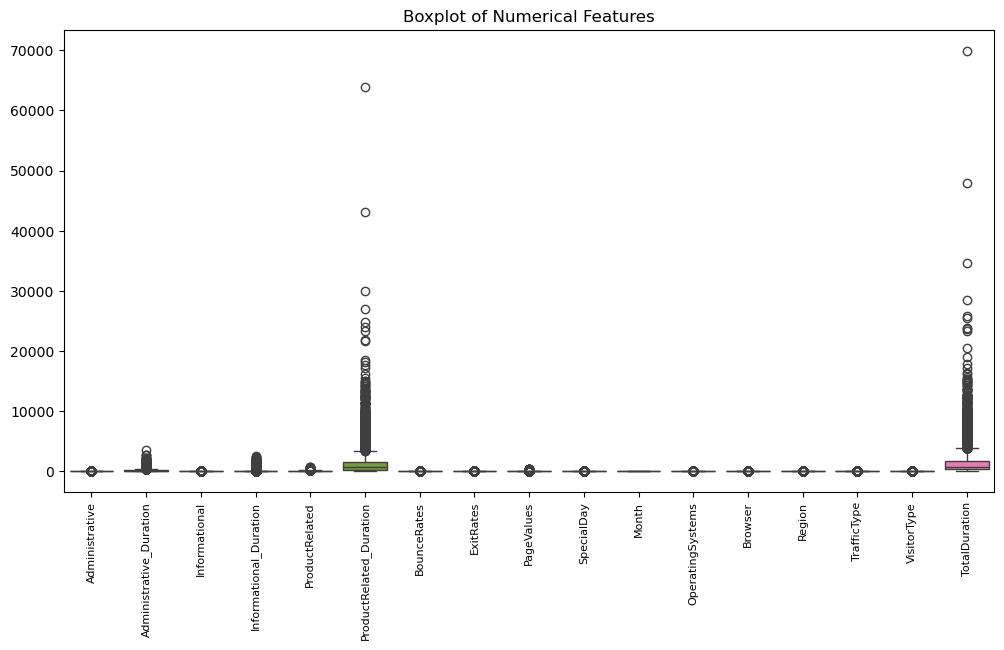

In [229]:
# create boxplots for all numerical columns
plt.figure(figsize=(12,6))
sns.boxplot(data=shoppers_df[num_cols])
plt.title('Boxplot of Numerical Features')
plt.xticks(fontsize=8, rotation=90)
plt.show()

- The main thing this visual shows is a general understanding of which features have the same units
- For example, all the duration columns use the same units but the actual page columns use different units so they're much more compacted

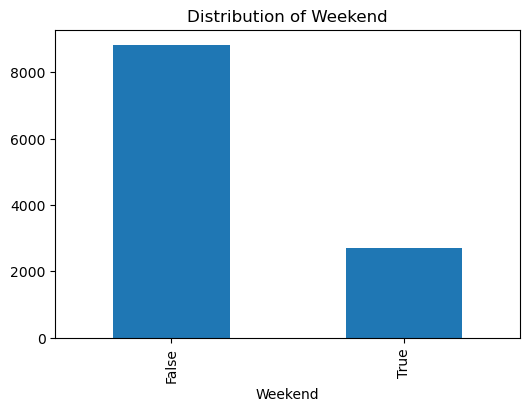

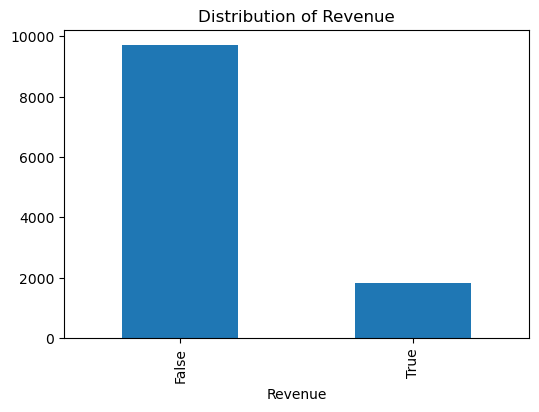

In [230]:
# create bar plots for the categorical columns (Weekend and Revenue)
for col in cat_cols:
    plt.figure(figsize=(6,4))
    shoppers_df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

- From the Weekend plot, we can see that there are many more False occurences, meaning that a majority of our session data occurs during the week
- We found surprising because we thought that a majority of the activity would occur over the weekend when people have more free time
- For the Revenue plot, we can see that a majority of our data is False in the Revenue column, meaning that a majority of sessions do not result in Revenue for the site

In [231]:
independent_cols = shoppers_df.drop('Revenue', axis=1)
dependent_col = shoppers_df['Revenue']
print("Independent Columns:")
for col in independent_cols.columns:
    print(col)
print("\nDependent Column:")
print(dependent_col.name)

Independent Columns:
Administrative
Administrative_Duration
Informational
Informational_Duration
ProductRelated
ProductRelated_Duration
BounceRates
ExitRates
PageValues
SpecialDay
Month
OperatingSystems
Browser
Region
TrafficType
VisitorType
Weekend
TotalDuration

Dependent Column:
Revenue


- This shows our independent columns and dependent column (Revenue)
- The independent columns are all columns that aren't Revenue
- This includes our calculated column, Total_Duration

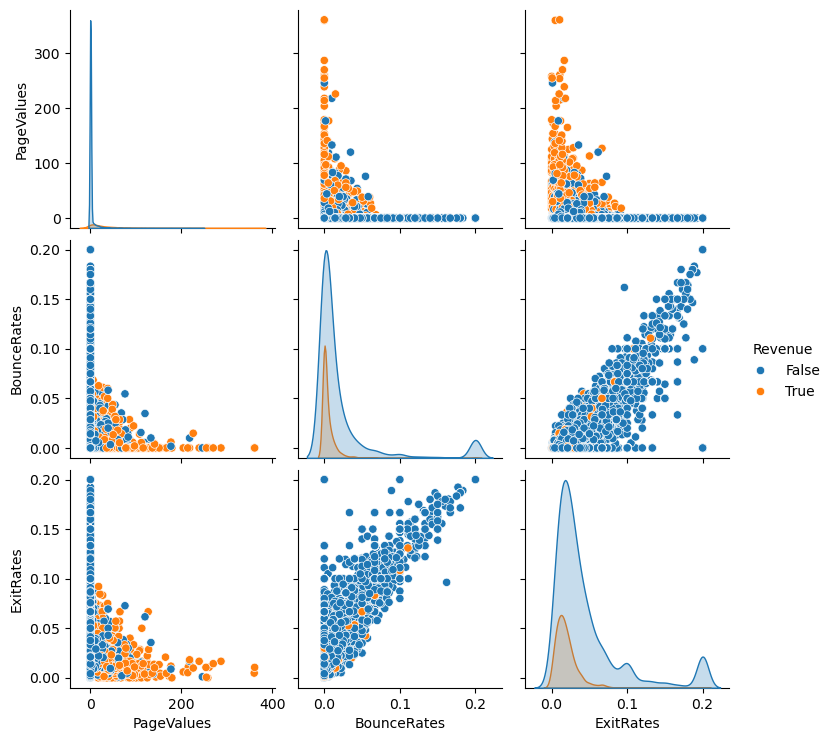

In [232]:
# create pairplots for our main metrics that are colored by Revenue
sns.pairplot(shoppers_df[['PageValues', 'BounceRates', 'ExitRates', 'Revenue']], hue ='Revenue')
plt.show()

**Key interpretations:**
- PageValues is the strongest predictor of Revenue.
- BounceRates and ExitRates negatively relate to Revenue.
- Most sessions do not convert. The scatterplots will show a dense cluster of Revenue=False points near zero PageValues and higher BounceRates.
- Distributions are skewed. Histograms confirm that numeric features like PageValues and durations are not normally distributed

<u>**Section 3 - Data Analytics**</u>

**Supervised or Unsupervised Learning:**
- In our dataset, revenue is a binary variable indicating whether a transaction occurred, a clear label for the outcome we want to predict. Therefore, we used supervised learning because we have input features and a known output. Our goal is to predict whether a session will result in a purchase.

In [233]:
# use StandardScaler from scikit-learn to scale our independent columns to be uniform (same scale/units)
scaler = StandardScaler()
independent_scaled = scaler.fit_transform(independent_cols)
x_train, x_test, y_train, y_test = train_test_split(independent_scaled, dependent_col, test_size=TEST_SIZE, random_state=123)
logistic_reg_model = LogisticRegression().fit(x_train, y_train)
y_pred = logistic_reg_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression Model Accuracy: 0.8794
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2934
        True       0.75      0.32      0.45       532

    accuracy                           0.88      3466
   macro avg       0.82      0.65      0.69      3466
weighted avg       0.87      0.88      0.86      3466



- Basic Logistic Regression Model results in almost 88% accuracy, which is very good for not using any hyperparameters, or extra steps to tune the model

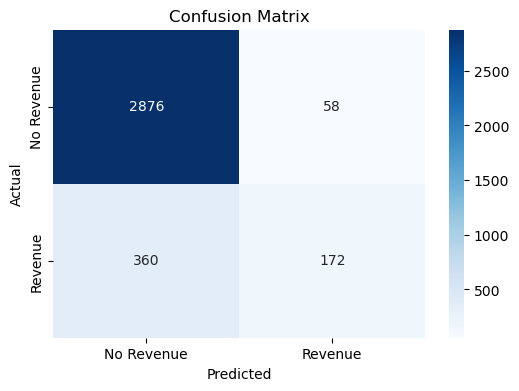

In [234]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- The main failure of this model is that it predicts No Revenue, when in fact there is Revenue in some cases
- This is a false negative issue

In [235]:
# use a base K-Nearest Neighbors Classifier model 
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_knn_pred = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, y_knn_pred)
print(f'KNN Classifier Model Accuracy: {knn_accuracy:.4f}')
print(f"Classification Report:\n{classification_report(y_test, y_knn_pred)}")

KNN Classifier Model Accuracy: 0.8748
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.97      0.93      2934
        True       0.67      0.37      0.48       532

    accuracy                           0.87      3466
   macro avg       0.78      0.67      0.70      3466
weighted avg       0.86      0.87      0.86      3466



- This model also does relatively well for just being the base model
- Has an accuracy of about 87% without any extra model tuning
- The accuracy is slightly lower, but the True recall value went up by around 5% which is a noteworthy improvement

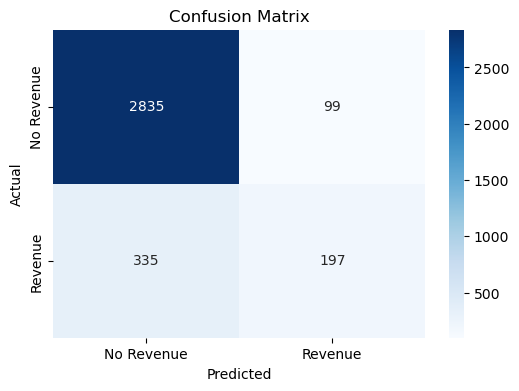

In [236]:
cm = confusion_matrix(y_test, y_knn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- This model has the same issue with false negatives, predicting No Revenue when there is Revenue in some cases

In [237]:
# use a base Random Forest Classifier model
rf = RandomForestClassifier(random_state=123)
rf.fit(x_train, y_train)
y_rf_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f'Random Forest Classifier Model Accuracy: {rf_accuracy:.4f}')
print(f"Classification Report:\n{classification_report(y_test, y_rf_pred)}")

Random Forest Classifier Model Accuracy: 0.9042
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2934
        True       0.76      0.55      0.64       532

    accuracy                           0.90      3466
   macro avg       0.84      0.76      0.79      3466
weighted avg       0.90      0.90      0.90      3466



- Accuracy had a major improvement at around 90% accuracy
- Because of this, both precision and recall also had major improvements when compared to the last two models

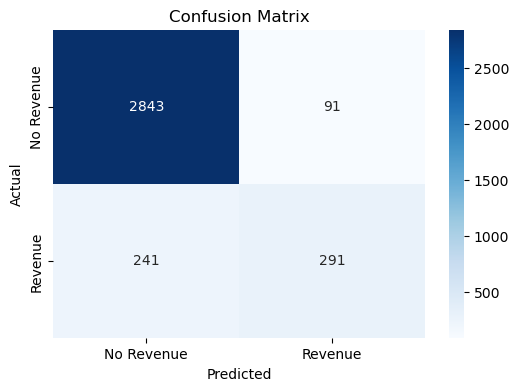

In [238]:
cm = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- This is different than the first two, because there are a lot less false negatives as well as some less false positives
- This is just because the overall accuracy of this model was over 2% higher than the previous models

In [239]:
# type of boosting classifier model from scikit-learn
gbc_model = GradientBoostingClassifier(random_state=123)
gbc_model.fit(x_train, y_train)
y_gbc_pred = gbc_model.predict(x_test)
gbc_accuracy = accuracy_score(y_test, y_gbc_pred)
print(f"Gradient Boosting Classifier Model Accuracy: {gbc_accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_gbc_pred)}")

Gradient Boosting Classifier Model Accuracy: 0.9080
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      2934
        True       0.76      0.59      0.66       532

    accuracy                           0.91      3466
   macro avg       0.84      0.78      0.80      3466
weighted avg       0.90      0.91      0.90      3466



- This was the model we found to have the highest accuracy at around 91%
- This was achieved with no model tuning, so the accuracy can likely be improved even further with advanced techniques

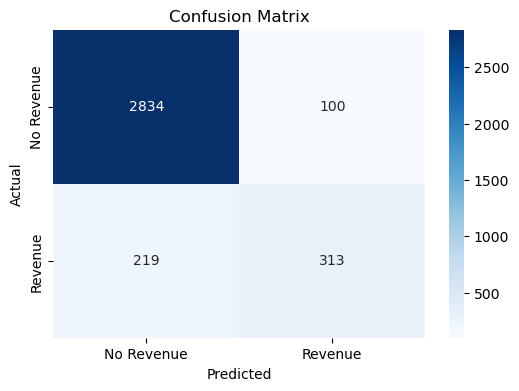

In [240]:
cm = confusion_matrix(y_test, y_gbc_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Less false negatives than the Random Forest model, but a few more false positives
- The accuracy didn't improve that much over the previous model, so we expected these minor changes

In [241]:
# another type of scikit-learn boosting classifier model
hgbc_model = HistGradientBoostingClassifier(random_state=123)
hgbc_model.fit(x_train, y_train)
y_hgbc_pred = hgbc_model.predict(x_test)
hgbc_accuracy = accuracy_score(y_test, y_hgbc_pred)
print(f"Hist Gradient Boosting Classifier Model Accuracy: {hgbc_accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_hgbc_pred)}")

Hist Gradient Boosting Classifier Model Accuracy: 0.9031
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2934
        True       0.74      0.57      0.64       532

    accuracy                           0.90      3466
   macro avg       0.83      0.77      0.79      3466
weighted avg       0.90      0.90      0.90      3466



- Very similar results to the base Random Forest model
- Similar accuracy, precision, and recall values
- Accuracy was around 90%

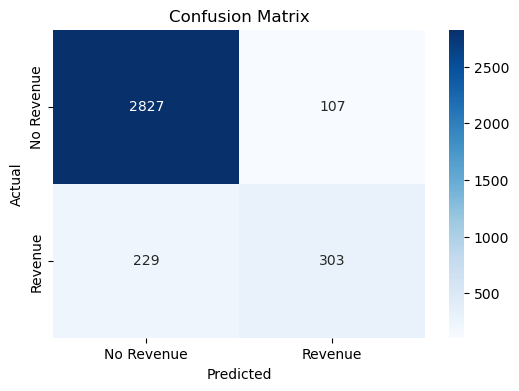

In [242]:
cm = confusion_matrix(y_test, y_hgbc_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Both false negatives and false positives went up when compared to the last model
- Again, similar results to the base Random Forest model

In [ ]:
# svc from scikit-learn is a type of Support Vector Machine (SVM) classifier model we learned about in class
svm_model = SVC(random_state=123)
svm_model.fit(x_train, y_train)
y_svm_pred = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, y_svm_pred)
print(f'SVM Classifier Model Accuracy: {svm_accuracy:.4f}')
print(f"Classification Report:\n{classification_report(y_test, y_svm_pred)}")

SVM Classifier Model Accuracy: 0.8935
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2934
        True       0.78      0.43      0.55       532

    accuracy                           0.89      3466
   macro avg       0.84      0.70      0.75      3466
weighted avg       0.88      0.89      0.88      3466



- One of the lower accuracies at around 89%
- Recall is very high compared to our other models

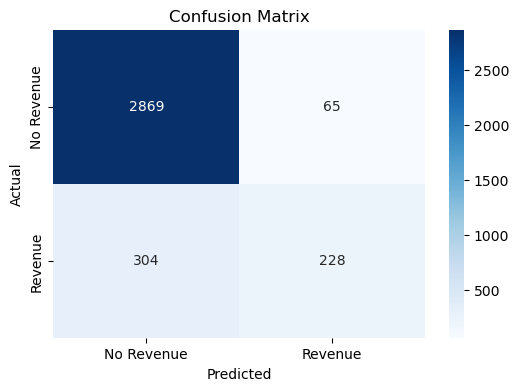

In [244]:
cm = confusion_matrix(y_test, y_svm_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Has the same issue with false negatives, predicting No Revenue when there is Revenue in some cases
- Did very well in precision, so there were a lot less false positives

**Summary of Models**
- Random Forest models seemed to perform the best, with the highest accuracies (all over 90%)
- The K-Nearest Neighbors model had the lowest accuracy at 87.48%
- Gradient Boosting had highest accuracy overall at 90.8%
- The Random Forest models are ensembling models, so because they combine decision trees, they worked very well for this application
- Boosting these trees also helped to improve the accuracy even further
- NOTE: changing the test-train ratio will alter these accuracies, all of these results were done with a 70-30 split